## All images detection

In [1]:
import glob
# 定义你的图片文件夹路径
folder_path = '/workspace/data/Diagram_Coordinates/01patient/'
# 使用glob.glob()方法获取文件夹内所有.png文件的路径
file_paths = sorted(glob.glob(folder_path + '*.png'))
# 检查获取的文件路径列表
print(file_paths)

['/workspace/data/Diagram_Coordinates/01patient/00.png', '/workspace/data/Diagram_Coordinates/01patient/10.png', '/workspace/data/Diagram_Coordinates/01patient/20.png', '/workspace/data/Diagram_Coordinates/01patient/30.png', '/workspace/data/Diagram_Coordinates/01patient/40.png', '/workspace/data/Diagram_Coordinates/01patient/50.png', '/workspace/data/Diagram_Coordinates/01patient/60.png', '/workspace/data/Diagram_Coordinates/01patient/70.png', '/workspace/data/Diagram_Coordinates/01patient/80.png', '/workspace/data/Diagram_Coordinates/01patient/90.png']


['/workspace/data/Diagram_Coordinates/02patient/00.png', '/workspace/data/Diagram_Coordinates/02patient/10.png', '/workspace/data/Diagram_Coordinates/02patient/20.png', '/workspace/data/Diagram_Coordinates/02patient/30.png', '/workspace/data/Diagram_Coordinates/02patient/40.png', '/workspace/data/Diagram_Coordinates/02patient/50.png', '/workspace/data/Diagram_Coordinates/02patient/60.png', '/workspace/data/Diagram_Coordinates/02patient/70.png', '/workspace/data/Diagram_Coordinates/02patient/80.png', '/workspace/data/Diagram_Coordinates/02patient/90.png']
(96, 94)
(95, 91)
(98, 88)
(95, 86)
(94, 86)
(94, 86)
(95, 87)
(94, 88)
(94, 90)
(98, 92)


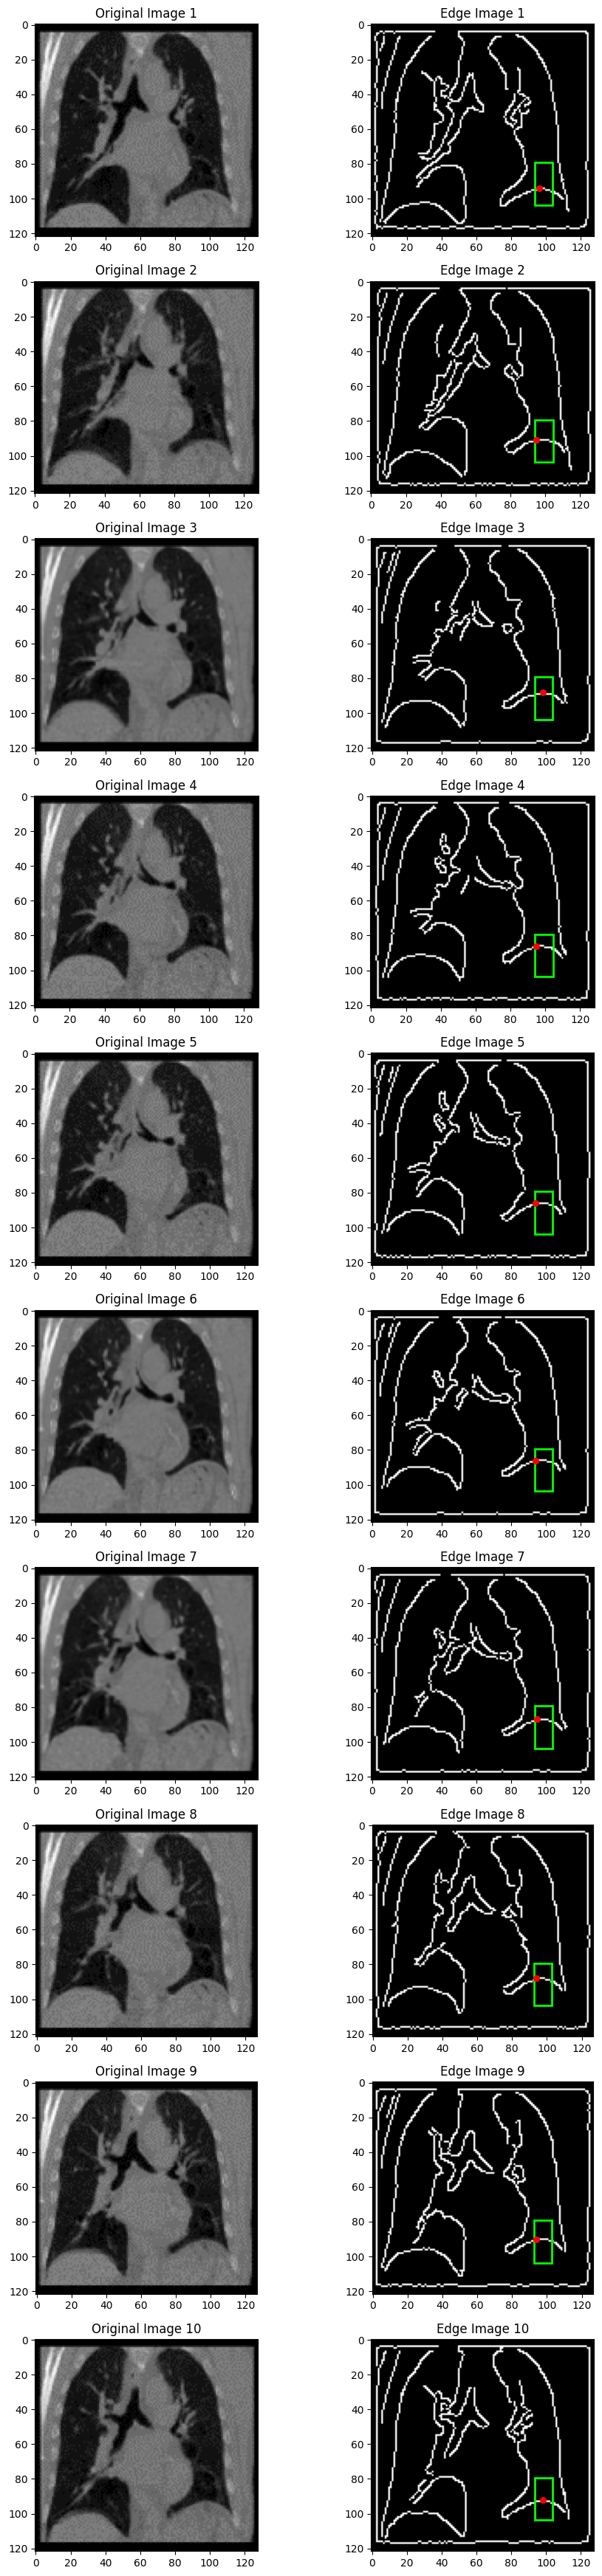

In [5]:
import glob
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as patches

# 定义你的图片文件夹路径
folder_path = '/workspace/data/Diagram_Coordinates/02patient/'
# 使用glob.glob()方法获取文件夹内所有.png文件的路径
file_paths = sorted(glob.glob(folder_path + '*.png')) # file_paths is a list
# 检查获取的文件路径列表
print(file_paths)

# 创建一个大的figure来显示所有的子图
plt.figure(figsize=(10, 35))

# 遍历所有的图片路径
for i, file_path in enumerate(file_paths, start=1):
    # 读取图片
    image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    
    # 应用高斯模糊
    blurred = cv2.GaussianBlur(image, (5, 5), 0)

    # 使用Canny边缘检测
    edges = cv2.Canny(blurred, 100, 200)

    #-----------------------------------------------------------
    # Find the coordinates of the highest points of the edges
    indices = np.where(edges == 255)
    coordinates = list(zip(indices[1], indices[0]))
    # Filter out points that are at the extreme left or right 10% of the image
    image_width = image.shape[1]
    image_height = image.shape[0]
    buffer_zone = image_width * 0.09
    # top-left(x,y): (buffer_zone, 0.7*image_height)  bottom-right:(2*buffer_zone, 0.9*image_height)
    # filtered_coordinates = [coord for coord in coordinates if buffer_zone < coord[0] < 2*buffer_zone and 0.7*image_height < coord[1] < 0.9*image_height] # Left
    # 划定方框范围: Right
    filtered_coordinates = []
    for coord in coordinates:
        # Check if the x-coordinate is within the buffer zone
        if image_width - 3*buffer_zone < coord[0] < image_width - 2.1*buffer_zone:
            # Check if the y-coordinate is within the specified height range
            if 0.65*image_height < coord[1] < 0.85*image_height:
                filtered_coordinates.append(coord)
    # 复杂点取最高点:
    # # Now find the points with the smallest y-values, which corresponds to the highest point on the diaphragm.
    # highest_points = sorted(filtered_coordinates, key=lambda x: x[1])[:10]
    # # Find the central highest point assuming the diaphragm is symmetrical around the center of the image.
    # central_highest_point = min(highest_points, key=lambda x: abs(x[0] - image_width/2))
    
    # 简单取最高点:
    central_highest_point = min(filtered_coordinates, key=lambda x: x[1])
    #-----------------------------------------------------------

    # 对每张图片创建两个子图: 原图和边缘检测图像
    plt.subplot(len(file_paths), 2, 2*i-1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Original Image {i}', fontsize=12)
    # plt.axis('off')

    plt.subplot(len(file_paths), 2, 2*i)
    plt.imshow(edges, cmap='gray')
    plt.title(f'Edge Image {i}',  fontsize=12)
    # plt.axis('off')

    # Draw rectangle: patches.Rectangle((x,y),width,height), (x,y) is top-left coordinate
    rect = patches.Rectangle((image_width - 3*buffer_zone, 0.65*image_height), 3*buffer_zone-2.1*buffer_zone, 0.85*image_height-0.65*image_height, linewidth=2, edgecolor="#00FF00", facecolor='none')
    plt.gca().add_patch(rect)
    # Mark the highest point on the edge image
    plt.scatter([central_highest_point[0]], [central_highest_point[1]], c='r', s=30)
    # plt.axis('off')

    print(central_highest_point)

plt.tight_layout()
plt.show()

# Edge detection

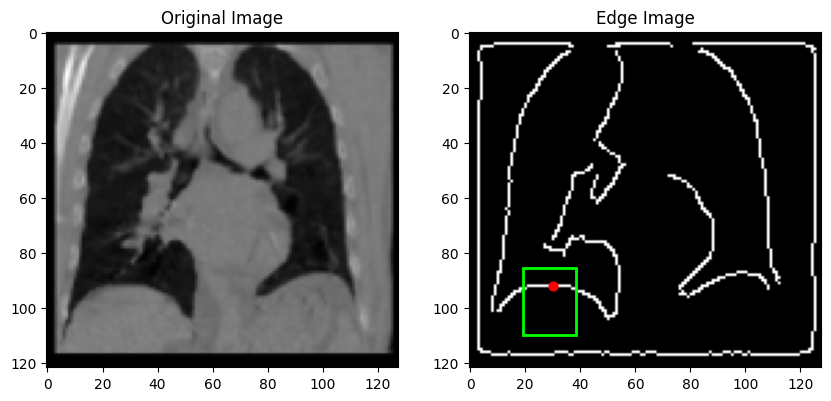

(30, 92)

In [19]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as patches

# Load the image from file
# file_path = '/workspace/SeqX2Y_PyTorch/test/diagram.png'
file_path = '/workspace/SeqX2Y_PyTorch/test/Contrast_save/C2.png'
image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
# roi = image[:, 20:40]

# Apply Gaussian Blur to reduce noise and improve edge detection
blurred = cv2.GaussianBlur(image, (9, 9), 0)

# Use Canny edge detector
edges = cv2.Canny(blurred, 100, 200)

# Find the coordinates of the highest points of the edges
indices = np.where(edges == 255)
coordinates = list(zip(indices[1], indices[0]))

# Filter out points that are at the extreme left or right 10% of the image
image_width = image.shape[1]
image_height = image.shape[0]
buffer_zone = image_width * 0.15
# top-left(x,y): (buffer_zone, 0.7*image_height)  bottom-right:(2*buffer_zone, 0.9*image_height)
filtered_coordinates = [coord for coord in coordinates if buffer_zone < coord[0] < 2*buffer_zone and 0.7*image_height < coord[1] < 0.9*image_height]
# Now find the points with the smallest y-values, which corresponds to the highest point on the diaphragm.
highest_points = sorted(filtered_coordinates, key=lambda x: x[1])[:10]
# Find the central highest point assuming the diaphragm is symmetrical around the center of the image.
central_highest_point = min(highest_points, key=lambda x: abs(x[0] - image_width/2))

plt.figure(figsize=(10, 10))

# Show the original image and the edges
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Original Image')#, plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(edges, cmap='gray')
plt.title('Edge Image')#, plt.xticks([]), plt.yticks([])
# Draw rectangle: patches.Rectangle((x,y),width,height), (x,y) is top-left coordinate
rect = patches.Rectangle((buffer_zone, 0.7*image_height), buffer_zone, 0.9*image_height-0.7*image_height, linewidth=2, edgecolor="#00FF00", facecolor='none')
plt.gca().add_patch(rect)

# Mark the highest point on the edge image
plt.scatter([central_highest_point[0]], [central_highest_point[1]], c='r', s=40)
plt.axis('on')
plt.show()

# Output the highest point coordinates
central_highest_point

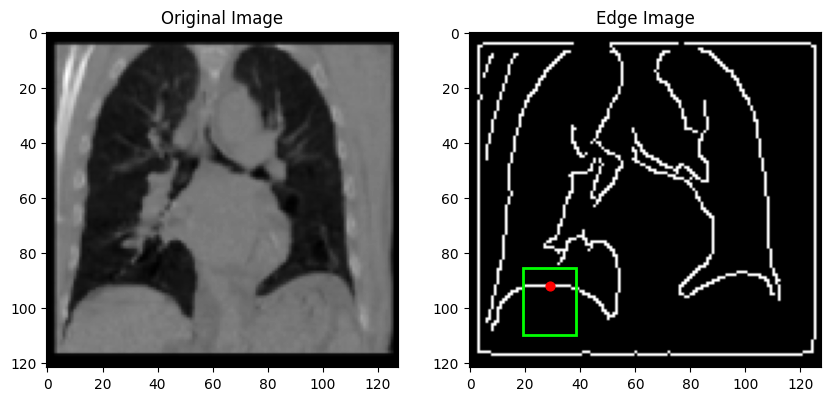

(29, 92)

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Load the image
image_path = '/workspace/SeqX2Y_PyTorch/test/Contrast_save/C2.png'
image = cv2.imread(image_path, 0)
# image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Gaussian Blur to reduce noise and improve edge detection
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Apply edge detection using Canny
edges = cv2.Canny(blurred, 100, 200) # 128*128
# edges = cv2.Canny(image, 60, 80) # org size

# Find the coordinates of the edges
indices = np.where(edges != [0])
coordinates = list(zip(indices[1], indices[0]))

# Since we're looking for the highest points of the diaphragm,
# we'll look for the edge points with the smallest y-values (since (0,0) is top-left in image coordinates).
# However, these points must also not be too close to the sides of the image to avoid the edges of the image.

# Filter out points that are at the extreme left or right 10% of the image
image_width = image.shape[1]
image_height = image.shape[0]
buffer_zone = image_width * 0.15
# top-left(x,y): (buffer_zone, 0.7*image_height)  bottom-right:(2*buffer_zone, 0.9*image_height)
filtered_coordinates = [coord for coord in coordinates if buffer_zone < coord[0] < 2*buffer_zone and 0.7*image_height < coord[1] < 0.9*image_height]

# Now find the points with the smallest y-values, which corresponds to the highest point on the diaphragm.
highest_points = sorted(filtered_coordinates, key=lambda x: x[1])[:10]

# Find the central highest point assuming the diaphragm is symmetrical around the center of the image.
central_highest_point = min(highest_points, key=lambda x: abs(x[0] - image_width/2))

# Visualize the detected edges and the highest central point of the diaphragm
plt.figure(figsize=(10, 10))

# Original image
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Original Image') 
# 移除或注释掉下面这两行，让坐标轴刻度显示
# plt.xticks([]), plt.yticks([])

# Edges Image with detected diaphragm highest point
plt.subplot(122), plt.imshow(edges, cmap='gray') 
plt.title('Edge Image')
# 移除或注释掉下面这两行，让坐标轴刻度显示
# plt.xticks([]), plt.yticks([])

# Draw rectangle: patches.Rectangle((x,y),width,height) 第一个参数是矩形左上角的坐标
rect = patches.Rectangle((buffer_zone, 0.7*image_height), buffer_zone, 0.9*image_height-0.7*image_height, linewidth=2, edgecolor="#00FF00", facecolor='none')
# Add the rectangle to the plot
plt.gca().add_patch(rect)

# Mark the central highest point of the diaphragm
plt.scatter([central_highest_point[0]], [central_highest_point[1]], c='r', s=40)

plt.show()

# Return the coordinates of the central highest point of the diaphragm
central_highest_point

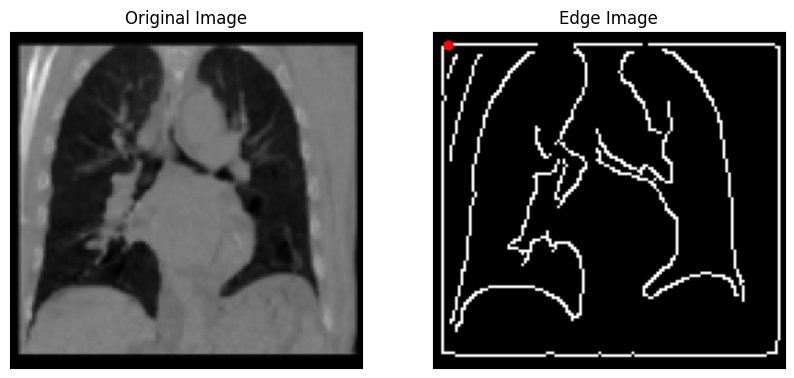

(5, 4)

In [116]:
# ORG Code

import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image from file
# file_path = '/workspace/SeqX2Y_PyTorch/test/diagram.png'
file_path = '/workspace/SeqX2Y_PyTorch/test/C2.png'
image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
roi = image[:, 20:40]

# Apply Gaussian Blur to reduce noise and improve edge detection
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Use Canny edge detector
edges = cv2.Canny(blurred, 100, 200)

# Find the coordinates of the highest points of the edges
indices = np.where(edges == 255)
coordinates = list(zip(indices[1], indices[0]))

# Since we're looking for the highest point of the diaphragm, 
# we need the points with the smallest y-coordinate (top of the image)
highest_point = min(coordinates, key=lambda x: x[1])
plt.figure(figsize=(10, 10))

# Show the original image and the edges
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(edges, cmap='gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

# Mark the highest point on the edge image
plt.scatter([highest_point[0]], [highest_point[1]], c='r', s=40)
plt.axis('on')
plt.show()

# Output the highest point coordinates
highest_point

/tmp/ipykernel_133352/642295686.py:38: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121), plt.imshow(roi, cmap='gray')


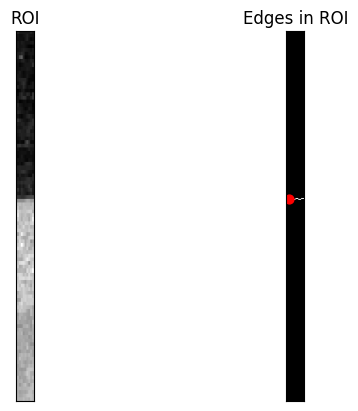

(3, 660)

In [48]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image from file
# file_path = '/workspace/SeqX2Y_PyTorch/test/diagram.png'
file_path = '/workspace/data/024/POPI_valseq3_2D_024/2DCT-2/C4.png'
image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

# Since we need to focus on the lower part of the lungs where the diaphragm is,
# we'll first define a region of interest (ROI) that corresponds to this area.

# We'll estimate the ROI to be in the lower third of the image
# ROI's origin (0,0) is typically at the top-left [左上角是(0,0)点] corner of the image. 
height, width = image.shape
roi_y_start = int(height * 0.7)
roi_y_end = height
roi_x_start = int(width * 0.12)
roi_x_end = int(width * 0.35)
# roi = image[roi_y_start:roi_y_end, roi_x_start:roi_x_end]
roi = image[270:roi_y_end, 120:140]

# Apply edge detection to this ROI
roi_edges = cv2.Canny(cv2.GaussianBlur(roi, (5, 5), 0), 60, 90)

# Find the coordinates of the highest points of the edges within this ROI
roi_indices = np.where(roi_edges == 255)
roi_coordinates = list(zip(roi_indices[1], roi_indices[0]))

# Adjust the coordinates to the original image scale
adjusted_coordinates = [(x, y + roi_y_start) for x, y in roi_coordinates]

# Find the highest point (lowest y-value since the origin is top-left)
diaphragm_highest_point = min(adjusted_coordinates, key=lambda x: x[1])

# Show the ROI and the edges within it
plt.axis('on')
plt.subplot(121), plt.imshow(roi, cmap='gray')
plt.title('ROI'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(roi_edges, cmap='gray')
plt.title('Edges in ROI'), plt.xticks([]), plt.yticks([])

# Mark the highest point on the ROI edge image
plt.scatter([diaphragm_highest_point[0]], [diaphragm_highest_point[1] - roi_y_start], c='r', s=40)
plt.show()

# Output the highest point coordinates adjusted to the original image scale
diaphragm_highest_point

# contrast

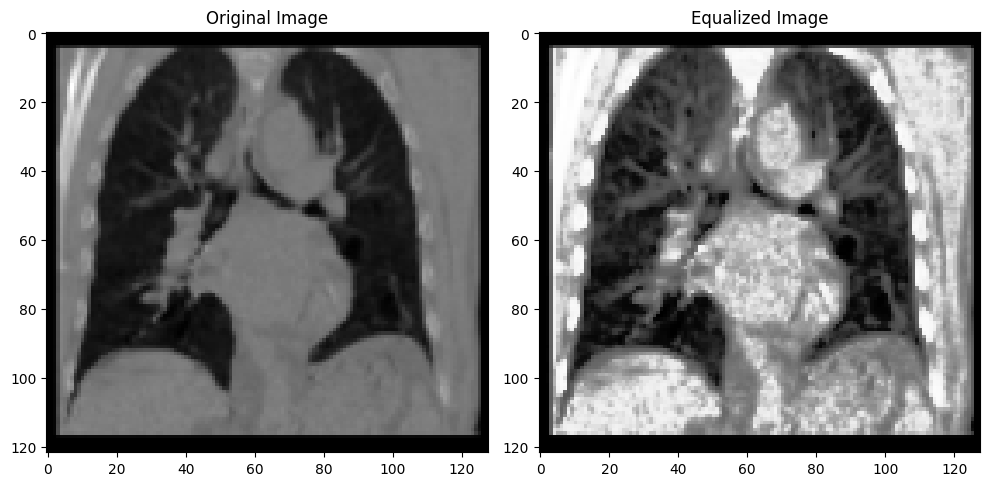

True

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/workspace/SeqX2Y_PyTorch/test/Contrast_save/C2.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Increase the contrast of the image
# We'll use histogram equalization to improve the contrast of the image
equalized_image = cv2.equalizeHist(image)

# Show the original and equalized images side by side
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('on')  # Show the axis

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('on')  # Show the axis

plt.tight_layout()
plt.show()

cv2.imwrite('/workspace/SeqX2Y_PyTorch/test/Contrast_save/equalized_C22.png', equalized_image)

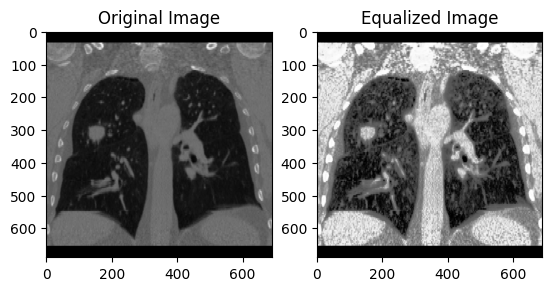

In [63]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load your image
image = cv2.imread('/workspace/data/024/POPI_seq3_2D_024/2DCT-1/C0.png', cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization to improve the contrast
equalized_image = cv2.equalizeHist(image)

# Display the original and equalized image
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(equalized_image, cmap='gray'), plt.title('Equalized Image')
plt.show()

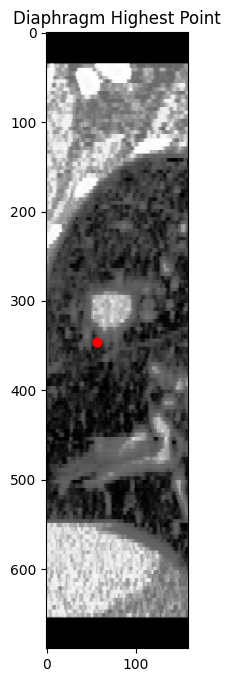

(56, 346)

In [160]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Since we've encountered issues running the code in the previous attempts, let's try a fresh start.
# First, we'll load the image again and perform the operations step by step.

# Load the new image for processing
file_path = '/workspace/SeqX2Y_PyTorch/test/Contrast_save/equalized_C2.png'
image_to_process = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

height, width = image_to_process.shape
roi_y_start = int(height * 0.7)
roi_y_end = height
roi_x_start = int(width * 0.12)
roi_x_end = int(width * 0.35)
roi = image_to_process[:, roi_x_start:roi_x_end]
# roi = image_to_process[:, :]

# Apply Gaussian Blur to reduce noise and improve the detection of edges
blurred_image = cv2.GaussianBlur(roi, (21,5), 0)

# Automatically determine the threshold using Otsu's method
high_thresh_val, _ = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
low_thresh_val = 0.5 * high_thresh_val

# Now, apply the Canny edge detector with the automatically determined threshold values
edges = cv2.Canny(blurred_image.astype(np.uint8), int(low_thresh_val), int(high_thresh_val))

# The diaphragm will be detected in the lower part of the image, so let's find the highest point there
# First, let's determine a rough estimate of where the diaphragm is likely to be located
# Assuming it to be in the bottom half of the image
height = edges.shape[0]
lower_half = edges[height // 2:]

# Now, find the highest point (smallest y-value) in the bottom half
# Note: np.where returns a tuple with two arrays, we need to transpose to get (x, y) pairs
non_zero_points = np.argwhere(lower_half == 255)

# Sort to find the point with the smallest y-value, which is our highest point on the diaphragm
highest_point = non_zero_points[np.argmin(non_zero_points[:, 0])]

# Adjust the y-coordinate according to the full image coordinates
highest_point_full_image = (highest_point[1], highest_point[0] + height // 2)

# Show the result on the original image
plt.figure(figsize=(8, 8))
plt.imshow(roi, cmap='gray')
plt.scatter([highest_point_full_image[0]], [highest_point_full_image[1]], c='r', s=40)
plt.title('Diaphragm Highest Point')
plt.axis('on')
plt.show()

# Return the highest point in the context of the full image
highest_point_full_image